Observable trends based on the data:

- Urban areas have the greatest number of rides per city type and generally a lower fare than other areas with less number of rides.
- It seems that the average fare is higher in cities with less drivers; however, the number of rides also seems to be lower in cities with lower number of drivers.
- The percentage of total rides (68.4%) and total drivers (86.2%) is significantly higher in urban cities than rural or suburban. 
-Although rural areas show the highest average fare per city type, they also show the smallest portion of the total fares by city. This might be related to the fact that rural cities have significantly less drivers and less rides than urban cities.



Challenge:

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship 
between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type


In [24]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# import file using pandas

city_df = pd.read_csv('raw_data/city_data.csv')
ride_df = pd.read_csv('raw_data/ride_data.csv')

print(city_df.head())
print(ride_df.head())


             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673


In [4]:
city_df = city_df.drop_duplicates('city', keep = 'first')
#city_unique_df = city_df["city"].nunique()
#.nunique

merged_cities = city_df.merge(ride_df, on = 'city')
merged_cities.head


<bound method NDFrame.head of                 city  driver_count   type                 date   fare  \
0         Kelseyland            63  Urban  2016-08-19 04:27:52   5.51   
1         Kelseyland            63  Urban  2016-04-17 06:59:50   5.54   
2         Kelseyland            63  Urban  2016-05-04 15:06:07  30.54   
3         Kelseyland            63  Urban  2016-01-25 20:44:56  12.08   
4         Kelseyland            63  Urban  2016-08-09 18:19:47  17.91   
5         Kelseyland            63  Urban  2016-10-24 15:15:46  33.56   
6         Kelseyland            63  Urban  2016-06-06 13:54:23  20.81   
7         Kelseyland            63  Urban  2016-08-10 07:02:40  44.53   
8         Kelseyland            63  Urban  2016-07-05 17:37:13  29.02   
9         Kelseyland            63  Urban  2016-04-25 02:18:31  20.05   
10        Kelseyland            63  Urban  2016-01-25 08:47:09   9.29   
11        Kelseyland            63  Urban  2016-11-10 01:57:14  20.58   
12        Kelseyland 

In [6]:
city_pd = pd.DataFrame(city_df)
city_pd
ride_pd = pd.DataFrame(ride_df)
ride_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [8]:
merge_table = pd.merge(city_pd, ride_pd, on="city")
print(merge_table.head())

merged_cities_df = pd.DataFrame(merged_cities)
merged_cities_df.head()

         city  driver_count   type                 date   fare        ride_id
0  Kelseyland            63  Urban  2016-08-19 04:27:52   5.51  6246006544795
1  Kelseyland            63  Urban  2016-04-17 06:59:50   5.54  7466473222333
2  Kelseyland            63  Urban  2016-05-04 15:06:07  30.54  2140501382736
3  Kelseyland            63  Urban  2016-01-25 20:44:56  12.08  1896987891309
4  Kelseyland            63  Urban  2016-08-09 18:19:47  17.91  8784212854829


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [9]:
city_type = merge_table.groupby('type')['city'].count()
city_type
                                

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [10]:
city_type = city_pd.set_index('city')['type']
city_type.head()


city
Kelseyland        Urban
Nguyenbury        Urban
East Douglas      Urban
West Dawnfurt     Urban
Rodriguezburgh    Urban
Name: type, dtype: object

In [9]:
#Average fare per city
average_fare_city = round(merge_table.groupby("city")["fare"].mean(),2)
average_fare_city

#Total Number of Rides per City
total_rides_per_city = merge_table.groupby("city")["ride_id"].count()
total_rides_per_city.head()

# Total Number of Drivers per City
number_drivers_per_city = merge_table.groupby('city')["driver_count"].sum()
number_drivers_per_city.head()

# City Type
city_type = city_df.set_index('city')['type']

# Create dataframe
city = pd.DataFrame({
    "Number of Rides": total_rides_per_city,
    "Average Fare": average_fare_city,
    "Number of Drivers": number_drivers_per_city,
    "Type of City": city_type
                    }
                   )

city = city.sort_values('Number of Drivers', ascending = False)
city.head()
#type of city ValueError: cannot reindex from a duplicate axis
#from stackoverflow: This error usually rises when you join / assign to a column when the index has duplicate values
#my solution: go back to city_df and drop duplicate city names

,Average Fare,Number of Drivers,Number of Rides,Type of City
Swansonbury,27.46,2176,34,Urban
Williamshire,26.99,2170,31,Urban
West Peter,24.88,1891,31,Urban
Lisaville,28.43,1848,28,Urban
Torresshire,24.21,1820,26,Urban


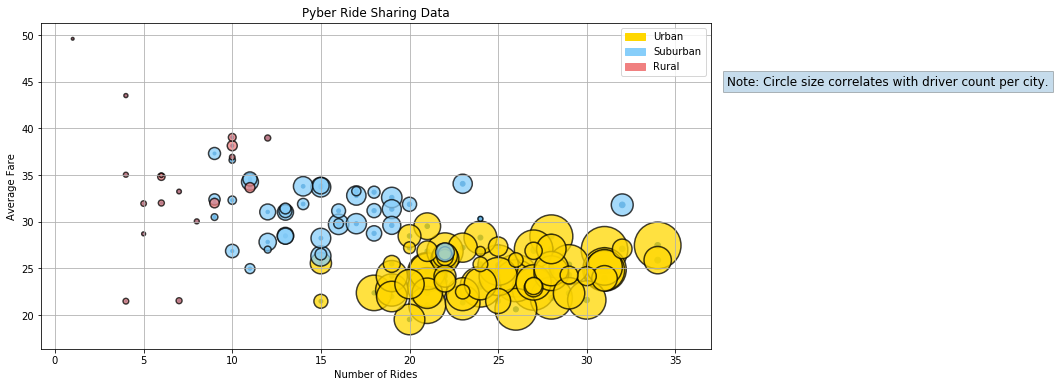

In [48]:
city.plot.scatter(x="Number of Rides", y="Average Fare", s=city['Number of Rides'], grid=True, figsize=(12,6), title="Pyber Ride Sharing Data")


plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers'], color = 'gold', edgecolor = 'black', label = 'Urban', alpha = .75, linewidth = 1.5)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers'], color = 'lightskyblue', edgecolor = 'black', label = 'Suburban', alpha = .75, linewidth = 1.5)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers'], color = 'lightcoral', edgecolor = 'black', label = 'Rural', alpha = .75, linewidth = 1.5)

gold_patch = mpatches.Patch(color='gold', label='Urban')
lightskyblue_patch = mpatches.Patch(color='lightskyblue', label='Suburban')
lightcoral_patch = mpatches.Patch(color='lightcoral', label = 'Rural')

plt.legend(loc='best', handles=[gold_patch,lightskyblue_patch, lightcoral_patch])


plt.text(47, 45, 'Note: Circle size correlates with driver count per city.', fontsize=12, bbox=dict(alpha=0.25), horizontalalignment='center', verticalalignment='center')
plt.show()




Pie Charts: 
* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

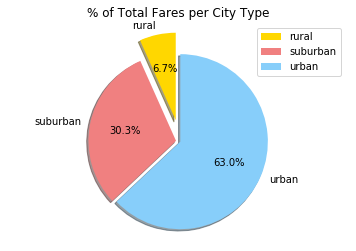

In [83]:
#total fare per city
total_fare_city = merge_table.groupby("type")["fare"].sum()

colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.25, 0.05, 0)
city_type = ["rural", "suburban", "urban"]

plt.pie(total_fare_city, explode=explode, labels=city_type, autopct = "%1.1f%%", colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.title("% of Total Fares per City Type")
plt.show()

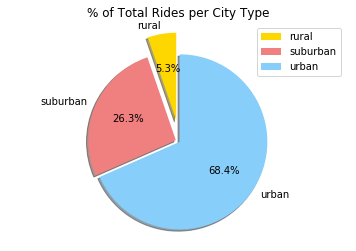

In [85]:
#total rides per city

total_ride_city = merge_table.groupby("type")["ride_id"].count()

#using same colors, explode, and label than before (already defined)

plt.pie(total_ride_city, explode=explode, labels=city_type, autopct = "%1.1f%%", colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.title("% of Total Rides per City Type")
plt.show()

In [86]:
total_drivers_city = merge_table.groupby("type")["driver_count"].sum()
total_drivers_city

type
Rural         727
Suburban     9634
Urban       64501
Name: driver_count, dtype: int64

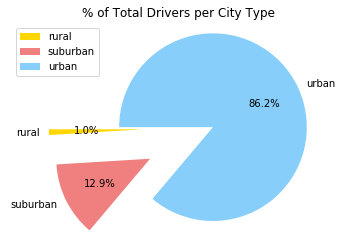

In [95]:
#total drivers per city

total_drivers_city = merge_table.groupby("type")["driver_count"].sum()

#using same colors and label than before (already defined)

explode = (0.75, 0.75, 0)
plt.pie(total_drivers_city, explode=explode, labels=city_type, autopct = "%1.1f%%", colors=colors, shadow=False, startangle=180)
plt.axis("equal")
plt.legend(loc = "best")
plt.title("% of Total Drivers per City Type")
plt.show()